In [1]:
import sys
sys.path.append('../data/')
from read_pandurata import *

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation

In [2]:
# input files
'../data/gr_0624_new.dat' # Grid File, 1st line
'../data/bb_0624_new.dat' # (unused) shape = (3072, 96) = (Nth*Nphi,Nr) # Each nth rows is a specific phi
'../data/ph_0624_new.dat' # shape: (336, 96) | This file is broken into 6 chunks of size Nph | each chunk corresponds to a component?
'../data/rh_0624_new.dat' # 
'../data/ta_0624_new.dat' # 
'../data/te_0624_new.dat' # 
'../data/u0_0624_new.dat' # 
'../data/u1_0624_new.dat' # 
'../data/u2_0624_new.dat' # 
'../data/u3_0624_new.dat' # 

# Output Files (in order written)

# Both files written over the 2-grid
# for (jth=0; jth<=Nth_obs; jth++) {
# for (je=0;  je<=Ne;       je++) { 
'../data/scat_spec.0624.dat' # Ispec, Qspec, Uspec (Polarisation spectra) | fname1
'../data/scat_line.0624.dat' # Lspec               (Iron line intensity)  | fname2 


# for (jr=0; jr<=Nr; jr++) {
# for (je=0; je<=Ne; je++) { 
'../data/scat_disk.0624.dat' # Rspec (specific intensity?) | fname3  https://en.wikipedia.org/wiki/Spectral_radiance (rate of radiative transfer of energy at P1)

# First Ispecr is written over the 2-grid
# for (jth=0; jth<=Nth_obs; jth++) {
# for (je=0;  je<=Ne;       je++) {
# then rr[jr], L_factr[jr], G_factr[jr] together on one line over the range:
# for (jr=0; jr<=Nr; jr++) {
# then Qspecr then Uspecr then Rspecr are written over the 3-grid:
#  for (jr=0;  jr<=Nr;       jr++) {
#  for (jth=0; jth<=Nth_obs; jth++) {
#  for (je=0;  je<=Ne;       je++) { 
# Finally Cspecr is written over the 2-grid:
# for (jr=0; jr<=Nr; jr++) {
# for (je=0; je<=Ne; je++) {
'../data/scat_spcr.0624.dat' # Ispecr then (rr, L_factr, G_factr) then Qspecr , Uspecr, Rspecr, Cspecr | fname6

# First image over 3-grid
#  for (it=0; it<=Nth_obs; it++) {
#  for (iy=0; iy<=Ni;      iy++) {
#  for (ix=0; ix<=Ni;      ix++) { 
# Then spcimage over 4-grid
# for (it=0; it<=Nth_obs; it++) {
# for (iy=0; iy<=Ni;      iy++) {
# for (ix=0; ix<=Ni;      ix++) {
# for (je=0; je<=Ne_obs;  je++) { 
'../data/scat_imag.0624.dat' # image, spcimage | fname4


# First imagex then imagey over the same 3-grid
# for (it=0; it<=Nth_obs; it++) {
# for (iy=0; iy<=Ni;      iy++) {
# for (ix=0; ix<=Ni;      ix++) {
# Then spcimagex then imagey over the the 4-grid:
# for (it=0; it<=Nth_obs; it++) {
# for (iy=0; iy<=Ni;      iy++) {
# for (ix=0; ix<=Ni;      ix++) {
# for (je=0; je<=Ne_obs;  je++) { 
'../data/scat_ipol.0624.dat' # imagex, imagey, spcimagex, spcimagey | fname5

# corpow_ijk is then written over the 3-grid
# for (ir=0;  ir<=Nr;   ir++) {
# for (ith=0; ith<=Nth; ith++) {
# for (iph=0; iph<=Nph; iph++) { 
'../data/scat_cpow.0624.dat' # corpow_ijk | fname8

# Ispecp is written over the 3-grid
# for (jth=0; jth<=Nth_obs; jth++) {
# for (jph=0; jph<=Nph_obs; jph++) {
# for (je=0;  je<=Ne;       je++)  { 
'../data/scat_spcp.0624.dat' # Ispecp | fname9

# First phimage then phimagex then phimagey are written over the 4-grid
# for (it=0; it<=Nth_obs; it++) {
# for (ip=0; ip<=Nph_obs; ip++) {
# for (ix=0; ix<=Ni;      ix++) {
# for (iy=0; iy<=Ni;      iy++) {
'../data/scat_ithp.0624.dat' # phimage, phimagex, phimagey | fname7


'../data/dump_times.dat'    


'../data/dump_times.dat'

In [3]:
def jth_to_theta(jth, Nth_obs, two_sided=False):
    """
    Parameters:
        jth (int): The theta bin index.
        Nth_obs (int): The total number of observer bins.
        two_sided (bool): Whether the TWO_SIDED mapping is used.
    
    Returns:
        float: The polar angle theta in radians.
    """
    if two_sided:
        cos_theta = 2 * (jth / (Nth_obs + 1)) - 1
    else:
        cos_theta = jth / (Nth_obs + 1)
    theta_rad = np.arccos(np.clip(cos_theta, -1, 1))
    return theta_rad

def read_ph_file(filename='ph_0624_new.dat'):
    print(f'reading {filename}...')
    print(f'This file is broken into 6 chunks of size Nph')
    data = np.loadtxt(filename, float)
    print(f'shape: {data.shape}')
    return data

In [4]:
Nr, Nt, Np, r_bins, th_bins, ph_bins = read_gr_file(filename='../data/gr_0624_new.dat')

Reading ../data/gr_0624_new.dat
r     : 1.33785 - 965.951 Nbins=96
theta : 0.0245437 - 3.11705 Nbins=64
phi   : 0.0654498 - 6.21774 Nbins=48
Finished reading Grid file...


In [5]:
Ne = 100
e_min = 0.001
e_max = 10000.0

# These are the values are they are defined in panhead.h
Nth_obs = 40
Nr      = 95
Ni      = 80
Ne_obs  = 10
Nth     = 63
Nph     = 47
Nth_obs = 40
Nph_obs = 0

yUnit = 2.41799e17*0.1  # 2.41799e17 Hz/keV to get units right and then factor of 0.1 to get the normalization better. Ultimately, the normalization is arbitrary.

nu0 = e_min * np.logspace(0, np.log10(e_max/e_min), Ne+1)


In [6]:
print('====== Spectral Data ======')
Ispec, Qspec, Uspec, Ispec_s, Qspec_s, Uspec_s = read_scat_spec(filename='../data/scat_spec.0624.dat', Nth_obs=40, Ne=Ne)
print('====')
print('====== Iron Line Data ======')
Lspec = read_scat_line(filename='../data/scat_line.0624.dat', Nth_obs=Nth_obs, Ne=Ne)
print('====')
Rspec = read_scat_disk(filename='../data/scat_disk.0624.dat', Nr=Nr, Ne=Ne)
print('====')
Ispecr, (rr, L_factr, G_factr), Qspecr, Uspecr, Rspecr, Cspecr = read_scat_specr(filename="../data/scat_spcr.0624.dat", Nr=Nr, Nth_obs=Nth_obs, Ne=Ne)
print('====')
image, spcimage = read_scat_imag(filename='../data/scat_imag.0624.dat', Nth_obs=Nth_obs, Ni=Ni, Ne_obs=Ne_obs)
print('====')
imagex, imagey, spcimagex, spcimagey = read_scat_ipol(filename='../data/scat_ipol.0624.dat', Nth_obs=Nth_obs, Ni=Ni, Ne_obs=Ne_obs)
print('====')
corpow_ijk = read_scat_cpow(filename='../data/scat_cpow.0624.dat', Nr=Nr, Nth=Nth, Nph=Nph)
print('====')
phimage, phimagex, phimagey = read_scat_ithp(filename='../data/scat_ithp.0624.dat', Nth_obs=Nth_obs, Nph_obs=Nph_obs, Ni=Ni)
print('====')
Ispecp = read_scat_spcp(filename='../data/scat_spcp.0624.dat', Nth_obs=Nth_obs, Nph_obs=Nph_obs, Ne=Ne)

====== Spectral Data ======
Reading ../data/scat_spec.0624.dat...
Expecting Ispec, Qspec, Uspec with shape (41, 101)
Expecting Ispec_s, Qspec_s, Uspec_s with shape (6, 41, 101)
Total lines in file: 861
Reading Ispec from lines 0 to 41
Reading Qspec from lines 41 to 82
Reading Uspec from lines 82 to 123
Reading Ispec_s (sorted spectra) from lines 123 onwards
Reading Qspec_s (sorted spectra) from lines 369 onwards
Reading Uspec_s (sorted spectra) from lines 615 onwards
Finished reading file!
Ispec shape: (41, 101), Qspec shape: (41, 101), Uspec shape: (41, 101)
Ispec_s shape: (6, 41, 101), Qspec_s shape: (6, 41, 101), Uspec_s shape: (6, 41, 101)
====
====== Iron Line Data ======
Reading ../data/scat_line.0624.dat...
Expecting Lspec with shape (41, 101)
Total lines in file: 41
Reading Lspec from lines 0 to 41
Finished reading file!
Lspec shape: (41, 101)
====
Reading ../data/scat_disk.0624.dat...
Expecting Rspec with shape (96, 101)
Total lines in file: 96
Reading Rspec from first 96 line

Ispec


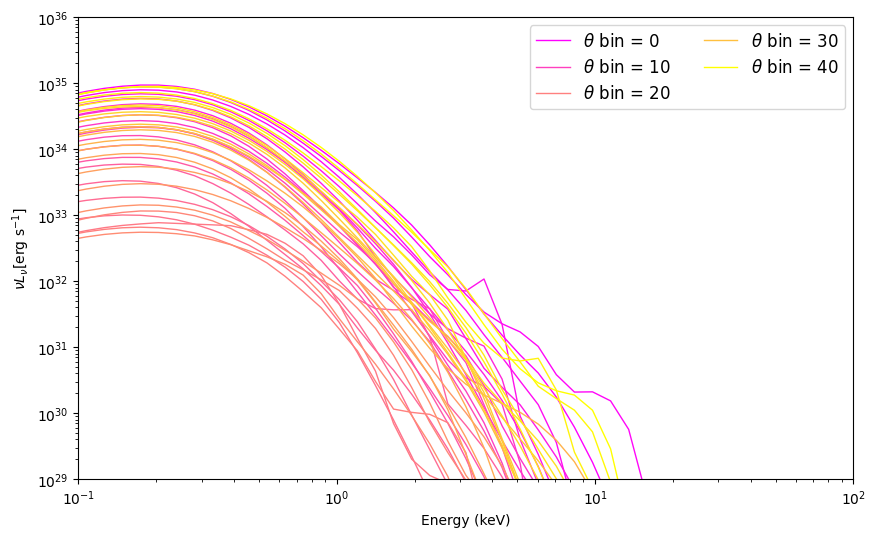

Qspec


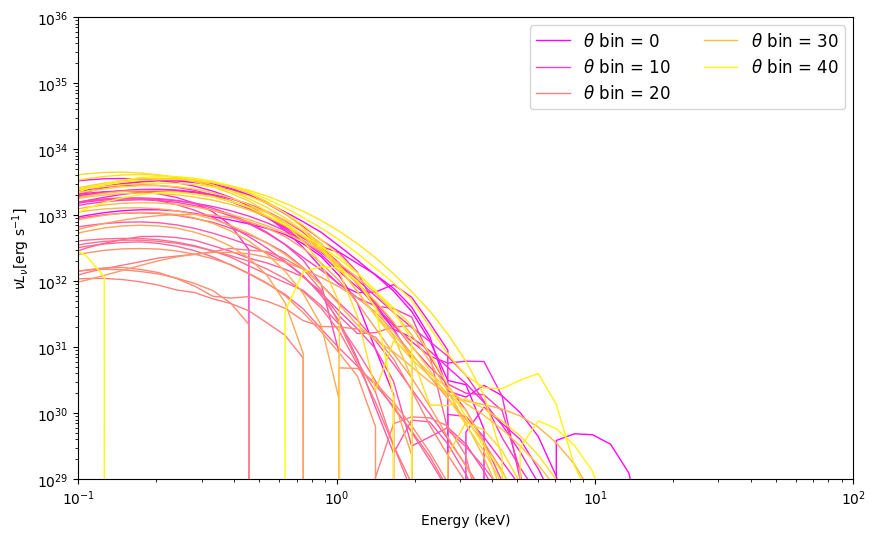

Uspec


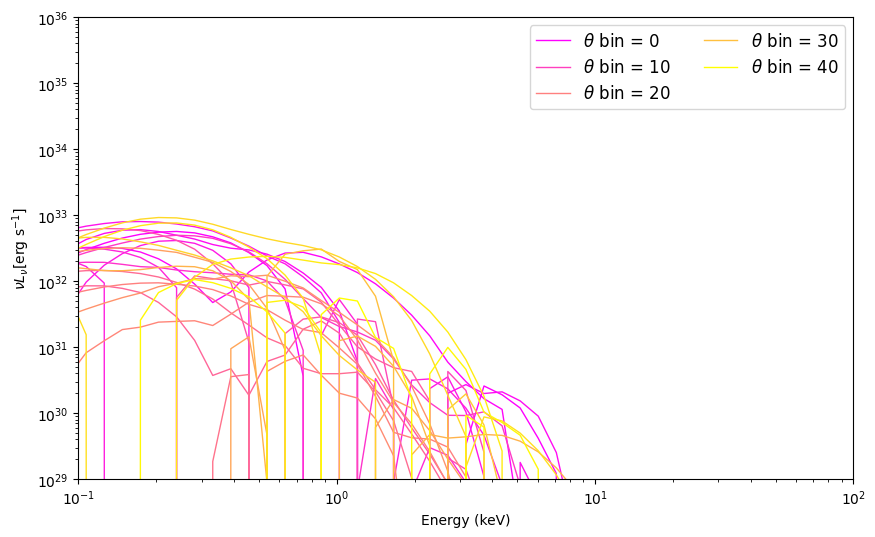

In [7]:
def plot_IQUspec_all_thetas(Xspec):
    colors = cm.spring(np.linspace(0, 1, Nth_obs + 1))

    plt.figure(figsize=(10, 6))
    for jth in range(Nth_obs + 1):
        y = yUnit * Xspec[jth] # Convert Hz/keV to erg/s^-1
        plt.plot(nu0, y, color=colors[jth], lw=1.0, label=fr'$\theta$ bin = {jth}' if jth % 10 == 0 else None)

    plt.ylim(0)
    plt.xlabel('Energy (keV)')
    plt.ylabel(r'$\nu L_\nu [\mathrm{erg~s^{-1}}]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e29, 1e36)
    plt.xlim(0.1,100)
    plt.legend(loc='upper right', fontsize=12, frameon=True, ncol=2)
    plt.show()

print('Ispec')
plot_IQUspec_all_thetas(Ispec)
print('Qspec')
plot_IQUspec_all_thetas(Qspec)
print('Uspec')
plot_IQUspec_all_thetas(Uspec)



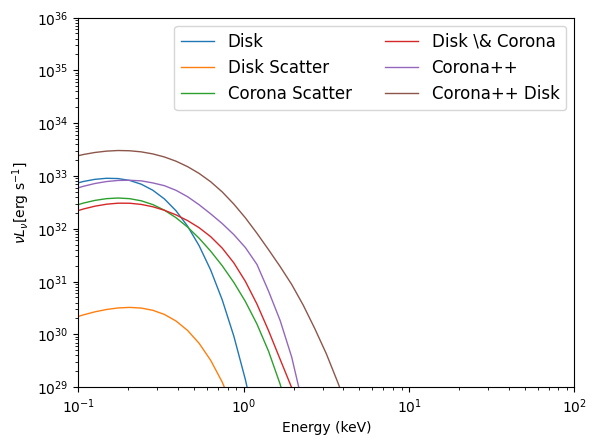

In [8]:
component = {r'Disk'           : 0,
             r'Disk Scatter'   : 1,
             r'Corona Scatter' : 2,
             r'Disk \& Corona' : 3,
             r'Corona++'       : 4,
             r'Corona++ Disk'  : 5}

component_rev = {v: k for k, v in component.items()}

jth = 25 # Theta bin to plot
colors = cm.spring(np.linspace(0, 1, Nth_obs + 1))
for k, idx in component.items():
    Ispec = Ispec_s[component[k]]
    y = yUnit * Ispec[jth] # Convert Hz/keV to erg/s^-1
    plt.plot(nu0, y, alpha=1.0, lw=1.0, label=k)

plt.ylim(0)
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\nu L_\nu [\mathrm{erg~s^{-1}}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e29, 1e36)
plt.xlim(0.1,100)
plt.legend(loc='upper right', fontsize=12, frameon=True, ncol=2)
plt.show()

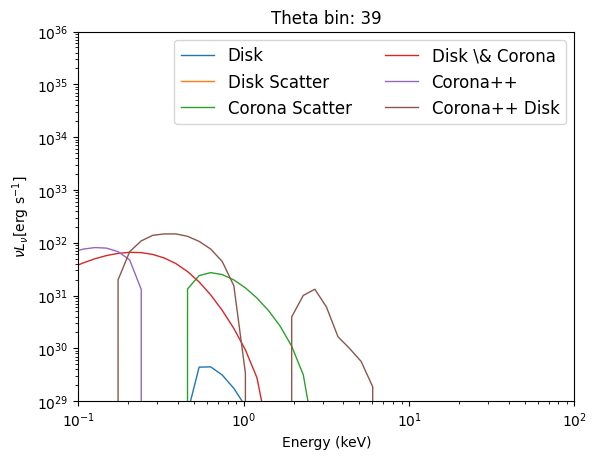

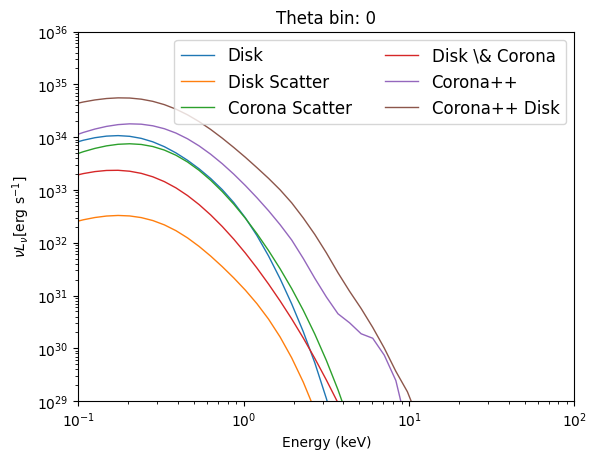

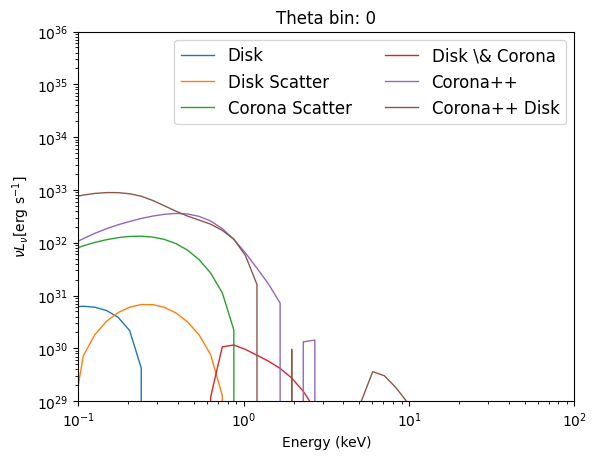

In [9]:
def plot_spectral_components(jth, spec_s):
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Energy (keV)')
    ax.set_ylabel(r'$\nu L_\nu [\mathrm{erg~s^{-1}}]$')
    ax.set_xlim(0.1, 100)
    ax.set_ylim(1e29, 1e36)
    ax.set_title(f'Theta bin: {jth}')
    
    lines = {}
    for k, idx in component.items():
        spec = spec_s[idx]
        y = yUnit * spec[jth]
        line, = ax.plot(nu0, y, label=k, lw=1.0)
        lines[k] = line
    
    ax.legend(loc='upper right', fontsize=12, frameon=True, ncol=2)
    return fig, ax, lines

def plot_spectral_components_animation(spec_s, savefile):
    def update(jth):
        ax.set_title(f'Theta bin: {jth}')
        for k, idx in component.items():
            spec = spec_s[idx]
            y = yUnit * spec[jth]
            lines[k].set_data(nu0, y)
        return list(lines.values())
    
    fig, ax, lines = plot_spectral_components(0, spec_s)
    ani = FuncAnimation(fig, update, frames=range(Nth_obs), interval=200, blit=False)
    ani.save(savefile, writer='ffmpeg', fps=10)


plot_spectral_components_animation(Uspec_s, 'Uspec_s.mp4')
plot_spectral_components_animation(Ispec_s, 'Ispec_s.mp4')
plot_spectral_components_animation(Qspec_s, 'Qspec_s.mp4')

Text(0.5, 1.0, 'Rspec (scat_disk) Reflection Spectrum')

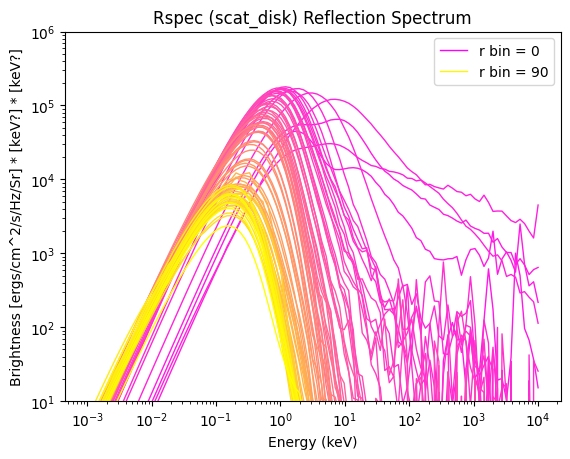

In [10]:
# Bnu has units of [ergs/cm^2/s/Hz/Sr]
# since Rspec += Bnu * dnu * dnu0[je]
# This gives     [ergs/cm^2/s/Hz/Sr] * [keV?] * [keV?]

colors = cm.spring(np.linspace(0, 1, Nr))

fig, ax = plt.subplots()
for i in range(Nr):
    ax.plot(nu0, Rspec[i], lw=1.0, color=colors[i], label=fr'r bin = {i}' if i==0 or i==90 else None)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Brightness [ergs/cm^2/s/Hz/Sr] * [keV?] * [keV?]')

#ax.set_xlim(0.1, 100)
ax.legend()
ax.set_ylim(10, 1e6)
ax.set_title(f'Rspec (scat_disk) Reflection Spectrum')

In [11]:
Ispecr.shape

(96, 41, 101)

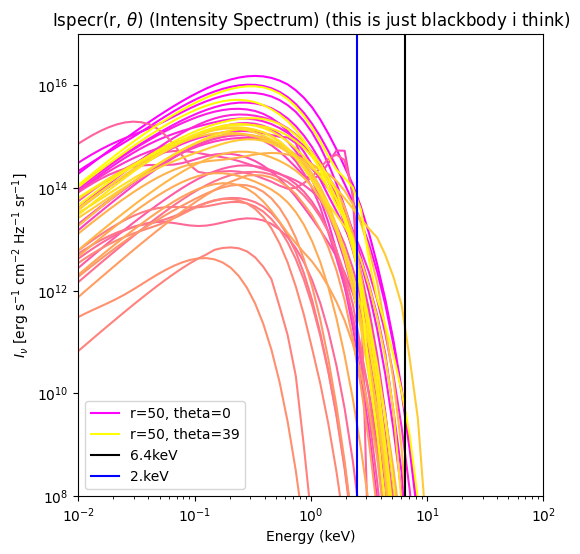

In [12]:
# https://en.wikipedia.org/wiki/Radiometry
# Ispecr has shape (96, 41, 101) (Nr, Nth_obs, Ne)

r_idx = 50
theta_idx = 20

colors = cm.spring(np.linspace(0, 1, Nth_obs))

fig, ax = plt.subplots(figsize=(6,6))
for theta_idx in range(Nth_obs):
    ax.plot(nu0, Ispecr[r_idx, theta_idx, :], color=colors[theta_idx], label=f"r={r_idx}, theta={theta_idx}" if theta_idx==0 or theta_idx==39 else None)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e8, 1e17)
plt.xlim(0.01, 100)
plt.xlabel("Energy (keV)")
plt.axvline(6.4, label='6.4keV', color='black')
plt.axvline(2.5, label='2.keV', color='blue')
plt.ylabel(r"$I_{\nu}~[\mathrm{erg~s^{-1}~cm^{-2}~Hz^{-1}~sr^{-1}}]$")
plt.legend()
plt.title(r"Ispecr(r, $\theta$) (Intensity Spectrum) (this is just blackbody i think)")
plt.show()



Text(0, 0.5, 'G_factr')

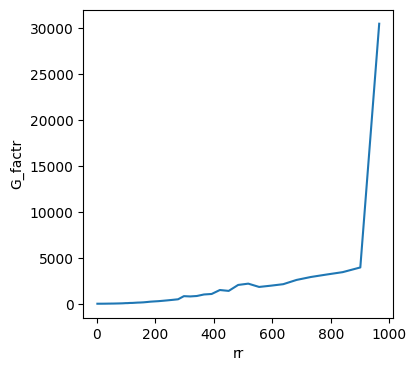

In [13]:
plt.figure(figsize=(4,4))
plt.plot(rr, G_factr)
plt.xlabel('rr')
plt.ylabel('G_factr')

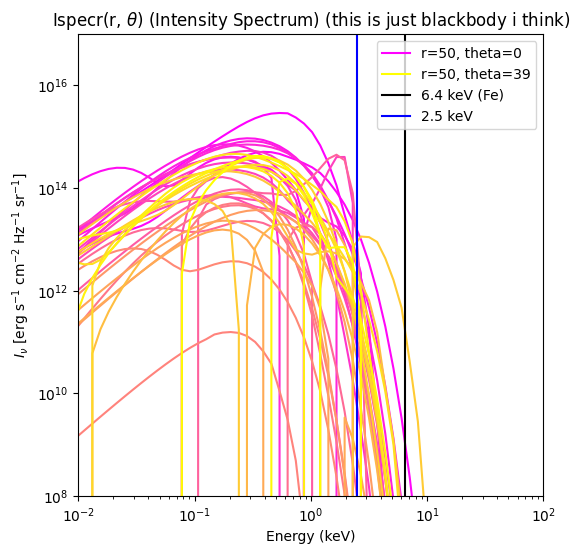

In [14]:
# https://en.wikipedia.org/wiki/Radiometry
# Ispecr has shape (96, 41, 101) (Nr, Nth_obs, Ne)

r_idx = 50
theta_idx = 20

colors = cm.spring(np.linspace(0, 1, Nth_obs))

fig, ax = plt.subplots(figsize=(6,6))
for theta_idx in range(Nth_obs):
    ax.plot(nu0, Qspecr[r_idx, theta_idx, :], color=colors[theta_idx], label=f"r={r_idx}, theta={theta_idx}" if theta_idx==0 or theta_idx==39 else None)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e8, 1e17)
plt.xlim(0.01, 100)
plt.xlabel("Energy (keV)")
plt.axvline(6.4, label='6.4 keV (Fe)', color='black')
plt.axvline(2.5, label='2.5 keV', color='blue')
plt.ylabel(r"$I_{\nu}~[\mathrm{erg~s^{-1}~cm^{-2}~Hz^{-1}~sr^{-1}}]$")
plt.legend()
plt.title(r"Ispecr(r, $\theta$) (Intensity Spectrum) (this is just blackbody i think)")
plt.show()



# Spherical Coords convention
<center><img src="spherical_coords.png" width="400"></center>
$$\theta \in [0, \pi] (0 - 180)$$
$$\phi \in [0, 2\pi] (0 - 360)$$

**Spherical to Cartesian:**
$$x = r \sin\theta \cos\phi$$
$$y = r \sin\theta \sin\phi$$
$$z = r \cos\theta$$

**Cartesian to Spherical:**
$$r = \sqrt{x^2 + y^2 + z^2}$$
$$\theta = \cos^{-1} \left(\frac{z}{r}\right)$$
$$\phi = \tan^{-1} \left(\frac{y}{x}\right)$$




In [15]:
def plot_corpow_ijk_phi_slice(corpow_ijk, th_bins, r_bins, ph_bins, phi_bin, ax):
    """Plots a single polar slice for a given phi bin (vertical slice).
    
    create the following axes outside this function first:
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
    """
    th_mesh, r_mesh = np.meshgrid(th_bins, r_bins) # this could be moved outside the function
    ax.clear()
    ax.set_theta_zero_location('N')
    ph_deg = np.rad2deg(ph_bins[phi_bin])
    ax.set_title(f'corpow_ijk | $\phi$ bin = {phi_bin} | $\phi$ = {ph_deg:.2f}$^\circ$', pad=30)
    ax.grid(True, color='black', linewidth=0.5)

    # Convert to log while keeping the sign
    data = np.log10(abs(corpow_ijk[:, :, phi_bin]) + 1) * np.sign(corpow_ijk[:, :, phi_bin])
    vlim = np.max(np.abs(data))  # Make colormap symmetric
    m = ax.pcolormesh(th_mesh, r_mesh, data, cmap='bwr', vmin=-vlim, vmax=vlim)

    # Use this if you just want absolute value of the coronal power without the sign.
    #m = ax.pcolormesh(th_mesh, r_mesh, np.log10(abs(corpow_ijk[:, :, phi_bin] + 1)), cmap='jet')
    return m

def plot_corpow_ijk_theta_slice(corpow_ijk, th_bins, r_bins, ph_bins, theta_bin, ax):
    """Plots a single polar slice for a given theta bin (horizontal slice).

    create the following axes outside this function first:
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
    """
    ph_mesh, r_mesh = np.meshgrid(ph_bins, r_bins)
    theta_deg = np.rad2deg(th_bins[theta_bin])
    
    ax.set_theta_zero_location('N')
    ax.grid(True, color='black', linewidth=0.5)
    ax.set_title(f'corpow_ijk | $\\theta$ bin = {theta_bin} | $\\theta$ = {theta_deg:.2f}$^\circ$', pad=30)
    
    # Convert to log while keeping the sign
    data = np.log10(abs(corpow_ijk[:, theta_bin, :]) + 1) * np.sign(corpow_ijk[:, theta_bin, :])
    m = ax.pcolormesh(ph_mesh, r_mesh, data, cmap='bwr')
    return m

def animate_corpow_ijk_all_phi(corpow_ijk, th_bins, r_bins, ph_bins, Nph, savepath):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
    cbar = plt.colorbar(m, ax=ax, shrink=0.75)
    def update(phi_bin):
        m = plot_corpow_ijk_phi_slice(corpow_ijk, th_bins, r_bins, ph_bins, phi_bin, ax)
        cbar.update_normal(m)
        return m,
    
    ani = FuncAnimation(fig, update, frames=Nph, blit=False)
    ani.save(savepath, writer='ffmpeg', fps=3)
    print(f'Animation saved to {savepath}')
    plt.close()

def animate_corpow_ijk_all_theta(corpow_ijk, th_bins, r_bins, ph_bins, Nth, savepath):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
    cbar = plt.colorbar(m, ax=ax, shrink=0.75)
    def update(theta_bin):
        m = plot_corpow_ijk_theta_slice(corpow_ijk, th_bins, r_bins, ph_bins, theta_bin, ax)
        cbar.update_normal(m)
        return m,
    
    ani = FuncAnimation(fig, update, frames=Nth, blit=False)
    ani.save(savepath, writer='ffmpeg', fps=3)
    print(f'Animation saved to {savepath}')
    plt.close()
    

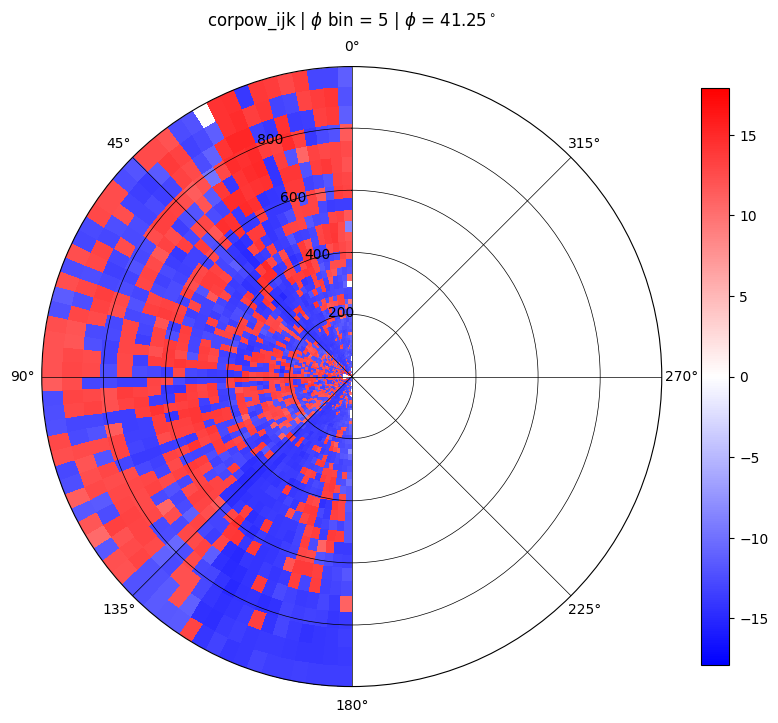

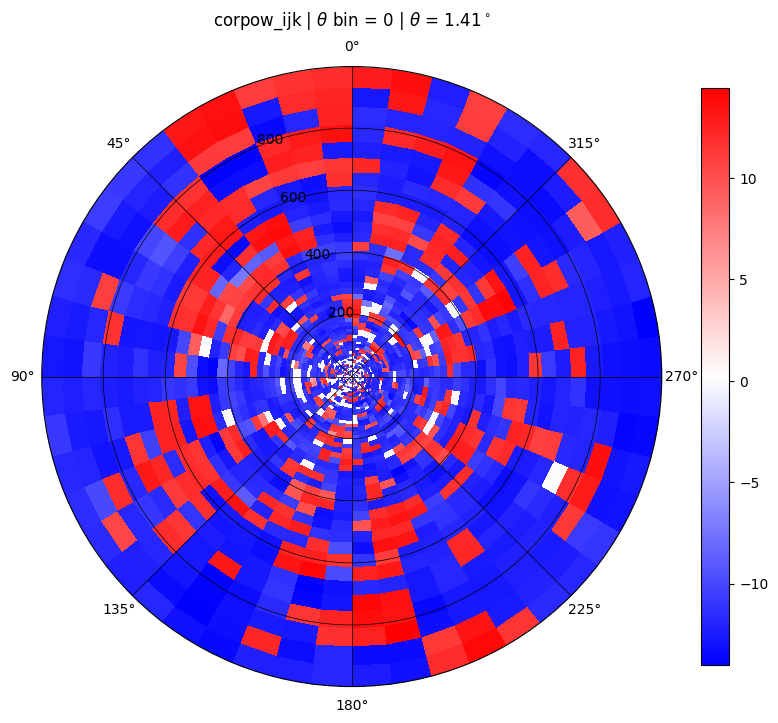

In [16]:
# Plot a Single Slice in phi (vertical slice)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
m = plot_corpow_ijk_phi_slice(corpow_ijk, th_bins, r_bins, ph_bins, phi_bin=5, ax=ax)
plt.colorbar(m, shrink=0.75)

# Plot a single Slice in theta (Horizontal Slice)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10, 10))
m = plot_corpow_ijk_theta_slice(corpow_ijk, th_bins, r_bins, ph_bins, theta_bin=0, ax=ax)
plt.colorbar(m, shrink=0.75)

In [17]:
animate_corpow_ijk_all_phi(corpow_ijk=corpow_ijk, th_bins=th_bins, r_bins=r_bins, ph_bins=ph_bins, Nph=Nph, savepath='corpow_ijk_all_phi.mp4')
animate_corpow_ijk_all_theta(corpow_ijk=corpow_ijk, th_bins=th_bins, r_bins=r_bins, ph_bins=ph_bins, Nth=Nth, savepath='corpow_ijk_all_theta.mp4')

/tmp/ipykernel_4414/163359370.py:43: UserWarning: Adding colorbar to a different Figure <Figure size 1000x1000 with 2 Axes> than <Figure size 1000x1000 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(m, ax=ax, shrink=0.75)


Animation saved to corpow_ijk_all_phi.mp4


/tmp/ipykernel_4414/163359370.py:56: UserWarning: Adding colorbar to a different Figure <Figure size 1000x1000 with 2 Axes> than <Figure size 1000x1000 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(m, ax=ax, shrink=0.75)


Animation saved to corpow_ijk_all_theta.mp4


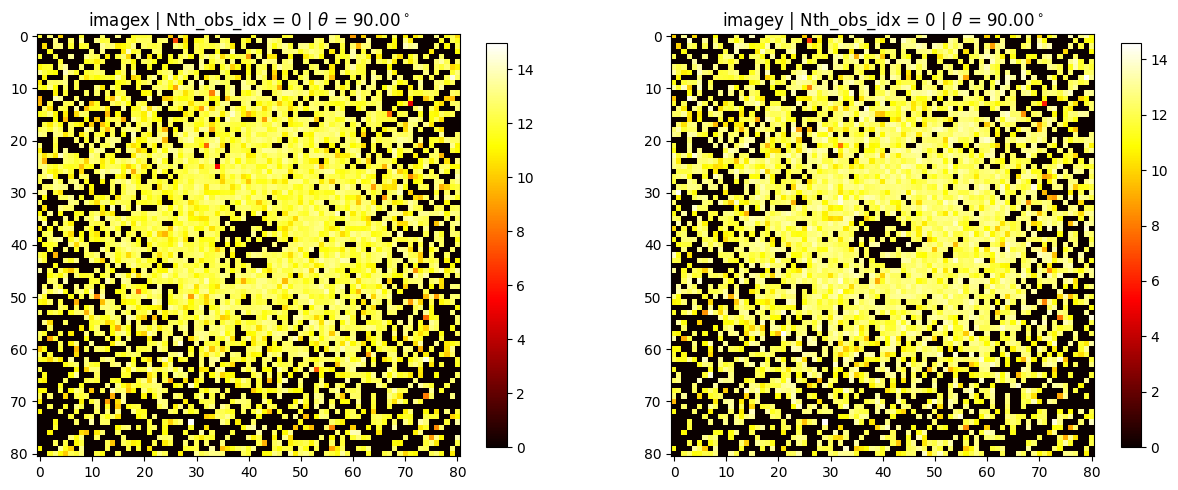

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,7.5))
Nth_obs_idx = 0
theta_deg   = np.rad2deg(jth_to_theta(Nth_obs_idx, Nth_obs, two_sided=False))
ax[0].set_title(f'imagex | Nth_obs_idx = {Nth_obs_idx} | $\\theta$ = {theta_deg:.2f}$^\circ$')
ax[1].set_title(f'imagey | Nth_obs_idx = {Nth_obs_idx} | $\\theta$ = {theta_deg:.2f}$^\circ$')
m1 = ax[0].imshow(np.log10(abs(imagex[Nth_obs_idx,:,:])+1), cmap='hot', interpolation='none')
m2 = ax[1].imshow(np.log10(abs(imagey[Nth_obs_idx,:,:])+1), cmap='hot', interpolation='none')
plt.colorbar(m1, shrink=0.70)
plt.colorbar(m2, shrink=0.70)

In [19]:
ph_data = read_ph_file(filename='../data/ph_0624_new.dat')

reading ../data/ph_0624_new.dat...
This file is broken into 6 chunks of size Nph
shape: (336, 96)


reading 0 ph block: 0 - 48


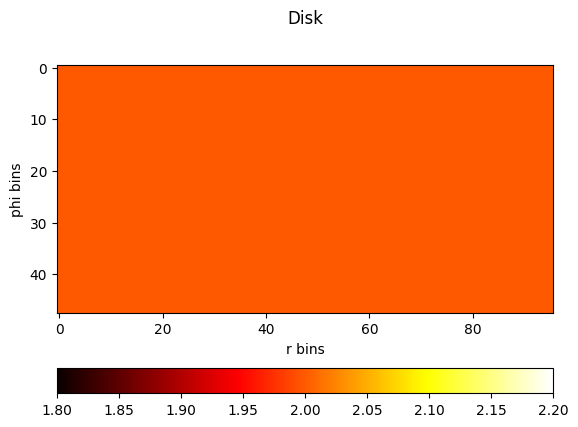

reading 1 ph block: 48 - 96


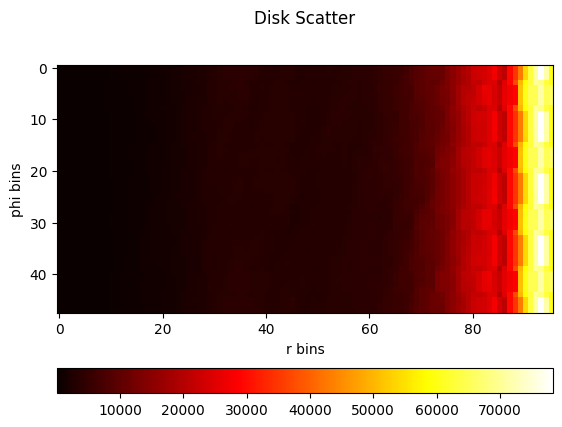

reading 2 ph block: 96 - 144


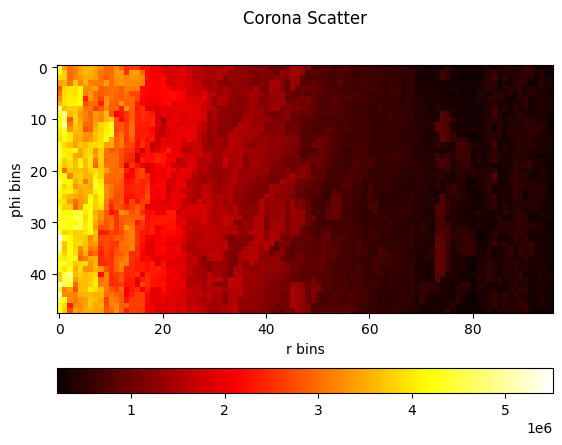

reading 3 ph block: 144 - 192


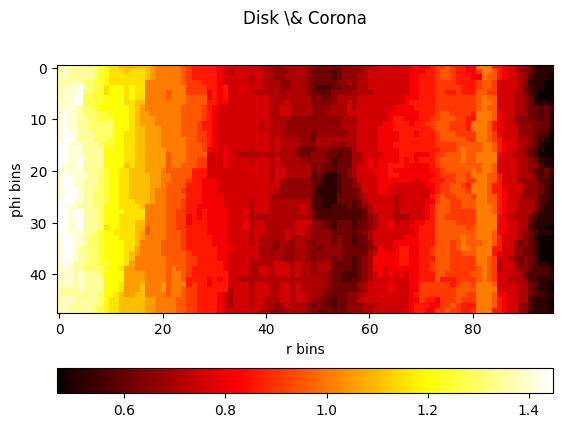

reading 4 ph block: 192 - 240


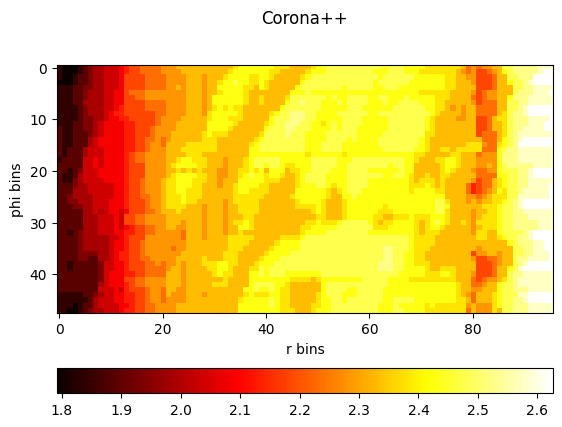

reading 5 ph block: 240 - 288


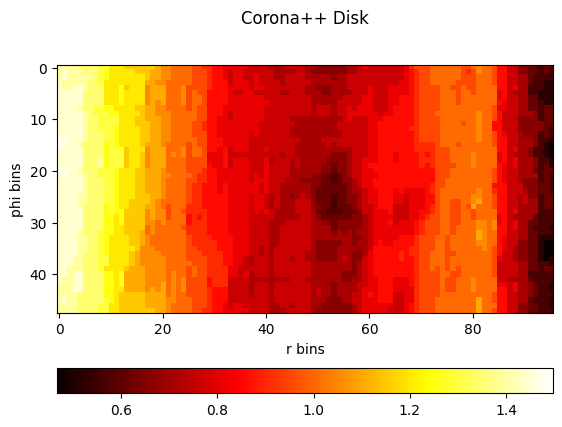

In [20]:
start = 0
end   = start + 48
for i in range(6):

    print(f'reading {i} ph block: {start} - {end}')
    data = ph_data[start:end,:]
    plt.figure()
    plt.title(component_rev[i], pad=30)
    plt.imshow(data, interpolation='none', cmap='hot')
    plt.colorbar(location='bottom')
    plt.xlabel('r bins')
    plt.ylabel('phi bins')
    plt.show()
    start = start + 48
    end   = start + 48

reading ph block: 0 - 48


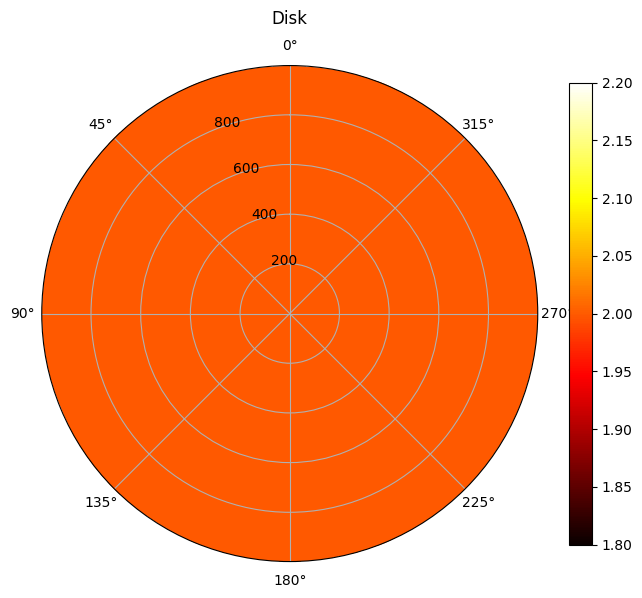

reading ph block: 48 - 96


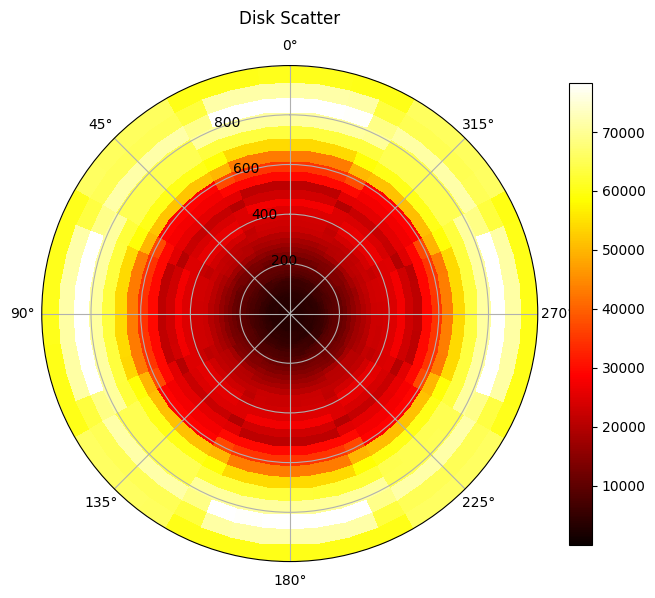

reading ph block: 96 - 144


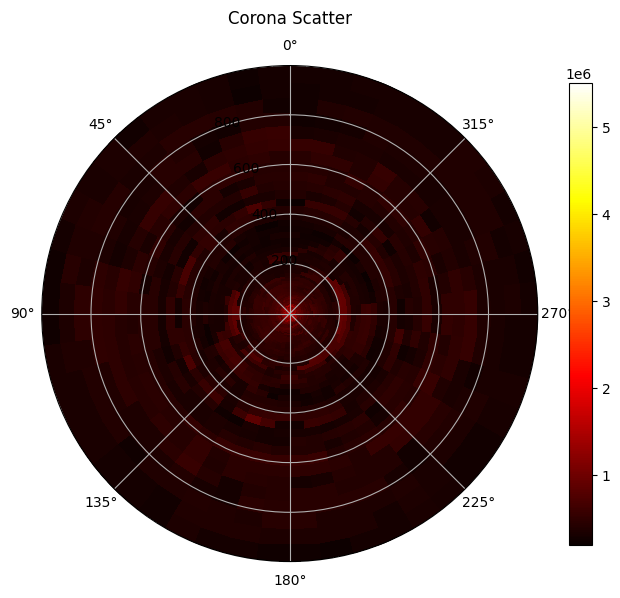

reading ph block: 144 - 192


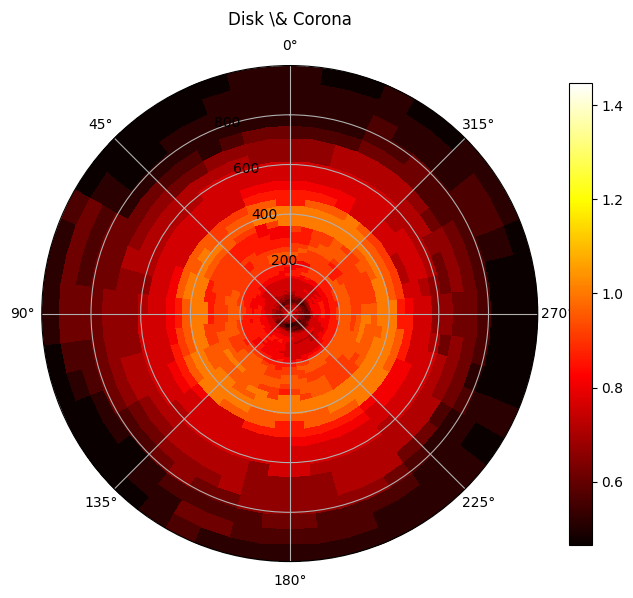

reading ph block: 192 - 240


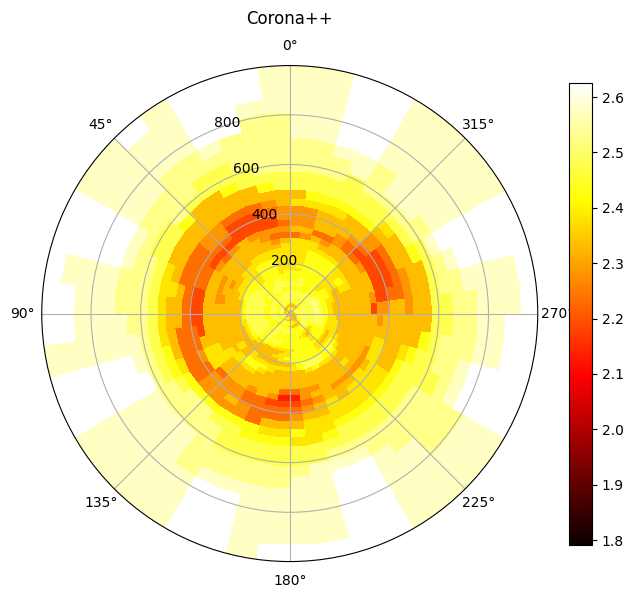

reading ph block: 240 - 288


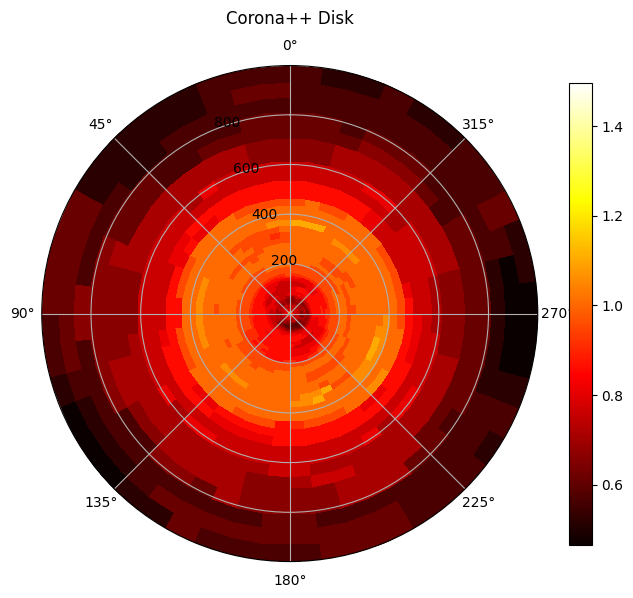

In [21]:
r_mesh, ph_mesh = np.meshgrid(r_bins, ph_bins)

start = 0
end   = start + 48
for i in range(6):
    print(f'reading ph block: {start} - {end}')
    data = ph_data[start:end,:]
    #if data.max() > 1e4:
    #    data = np.log10(data)
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8, 8))
    ax.set_title(component_rev[i], pad=30)
    ax.set_theta_zero_location('N')
    m = ax.pcolormesh(ph_mesh, r_mesh, data, cmap='hot')
    plt.colorbar(m, location='right', shrink=0.75)
    plt.show()
    start = start + 48
    end   = start + 48

In [22]:
def read_bb(filename='bb_0624_new.dat'):
    print(f'Reading {filename}')
    data = np.loadtxt(filename, float)
    print(f'shape: {data.shape}')
    print(f'This file is split into {data.shape[0]} / Nth chunks of size Nth')
    return data

bb = read_bb(filename='../data/bb_0624_new.dat')

Reading ../data/bb_0624_new.dat
shape: (3072, 96)
This file is split into 3072 / Nth chunks of size Nth


reading bb block: 0 - 64 | number: 0 / 48


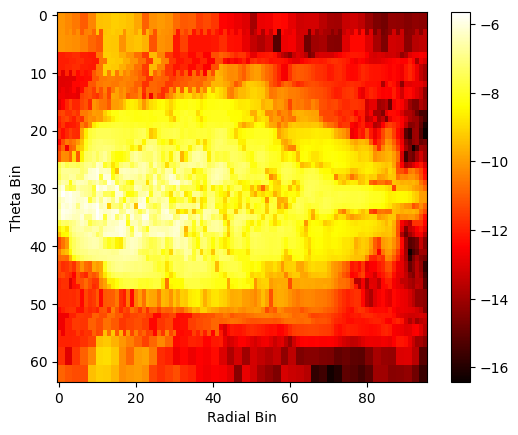

reading bb block: 64 - 128 | number: 1 / 48


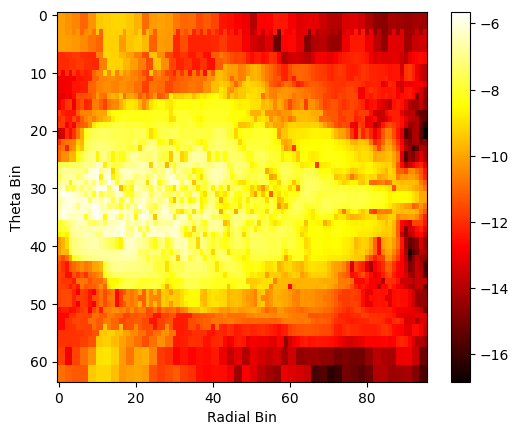

In [23]:
start = 0
end   = start + 64
N_slices = int(bb.shape[0] / 64)
for i in range(2): # N_slices
    print(f'reading bb block: {start} - {end} | number: {i} / {N_slices}')
    plt.figure()
    plt.imshow(np.log10(bb[start:end,:]), aspect=1.5, interpolation='none', cmap='hot')
    plt.colorbar()
    plt.xlabel('Radial Bin')
    plt.ylabel('Theta Bin')
    plt.show()
    start = start + 64
    end   = start + 64

reading bb block: 0 - 64 | number: 1 / 48


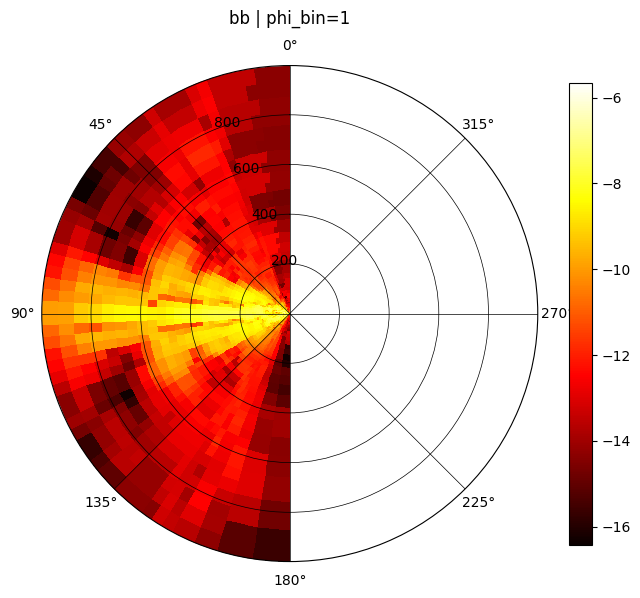

In [24]:
r_mesh, th_mesh = np.meshgrid(r_bins, th_bins)
start = 0
end   = start + 64
N_slices = int(bb.shape[0] / 64)
# for i in range(3): # N_slices
phi_bin = i = 1

print(f'reading bb block: {start} - {end} | number: {i} / {N_slices}')
data = np.log10(bb[start:end,:])
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8, 8))
ax.grid(color='black', lw=0.5)
ax.set_title(f'bb | phi_bin={i}', pad=30)
ax.set_theta_zero_location('N')
m = ax.pcolormesh(th_mesh, r_mesh, data, cmap='hot')
plt.colorbar(m, location='right', shrink=0.75)
plt.show()

start = start + 64
end   = start + 64

In [25]:
data = read_bb('../data/rh_0624_new.dat')

Reading ../data/rh_0624_new.dat
shape: (3072, 96)
This file is split into 3072 / Nth chunks of size Nth


../data/ph_0624_new.dat (336, 96) Min=4.66e-01 Mean = 1.92e+05 Max=5.51e+06 | has nans? False | has negatives? False
../data/rh_0624_new.dat (3072, 96) Min=2.22e-10 Mean = 9.68e-05 Max=2.35e-03 | has nans? False | has negatives? False
log10!


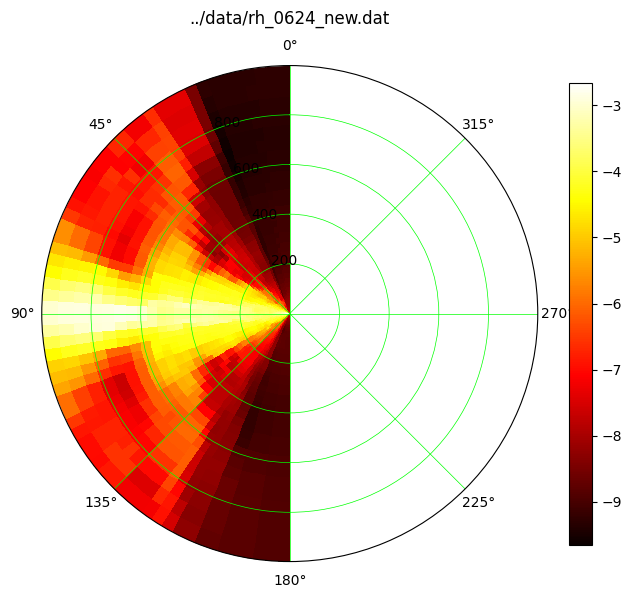

../data/ta_0624_new.dat (3120, 96) Min=0.00e+00 Mean = 2.98e+02 Max=3.62e+04 | has nans? False | has negatives? False
../data/bb_0624_new.dat (3072, 96) Min=4.33e-18 Mean = 3.30e-08 Max=3.78e-06 | has nans? False | has negatives? False
log10!


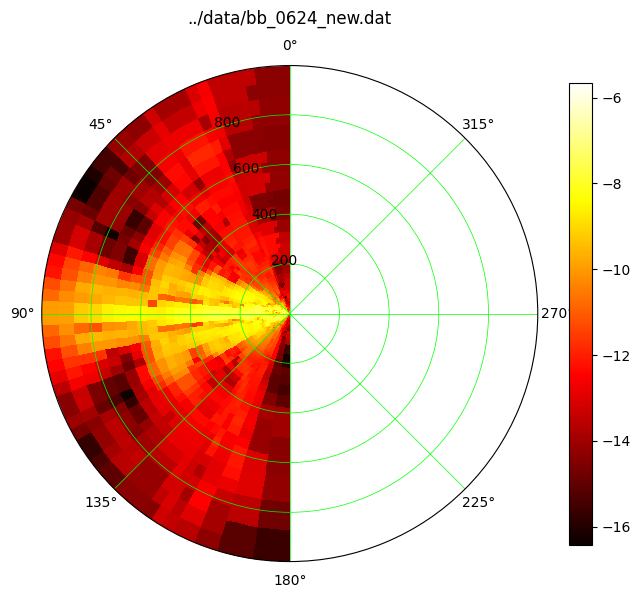

../data/te_0624_new.dat (3072, 96) Min=1.37e+05 Mean = 8.00e+07 Max=1.38e+09 | has nans? False | has negatives? False
log10!


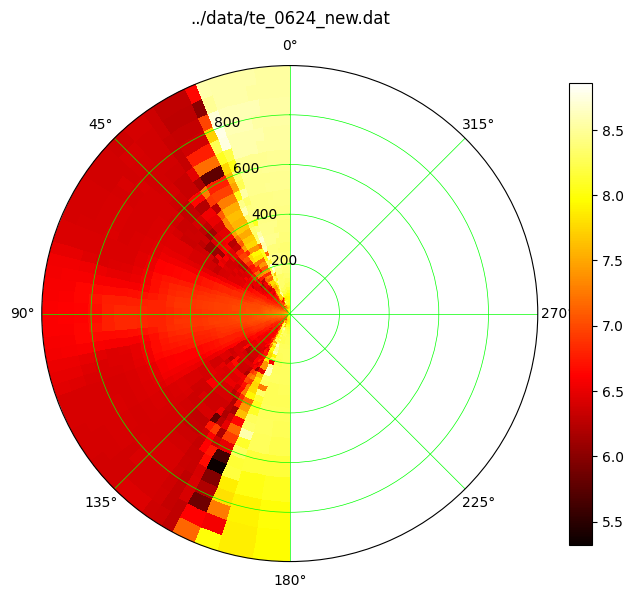

../data/u0_0624_new.dat (3072, 96) Min=1.00e+00 Mean = 1.73e+00 Max=4.62e+01 | has nans? True | has negatives? False


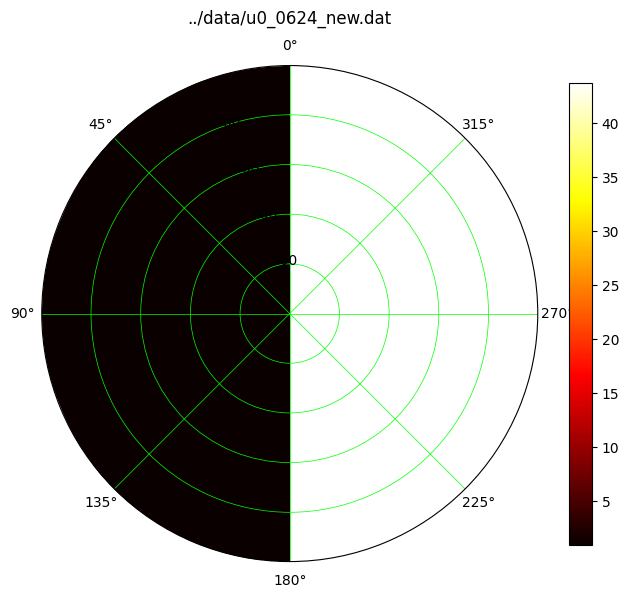

../data/u1_0624_new.dat (3072, 96) Min=-2.56e+00 Mean = 5.23e-02 Max=6.37e-01 | has nans? False | has negatives? True
log10!


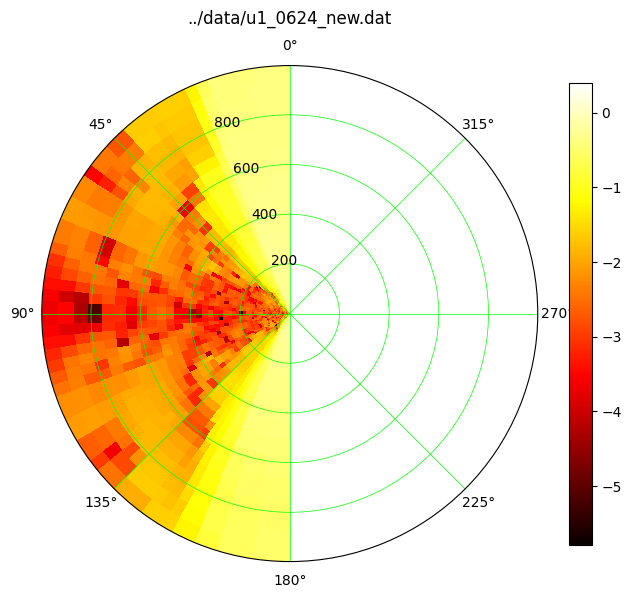

../data/u2_0624_new.dat (3072, 96) Min=-3.35e-01 Mean = -1.54e-04 Max=3.35e-01 | has nans? False | has negatives? True
log10!


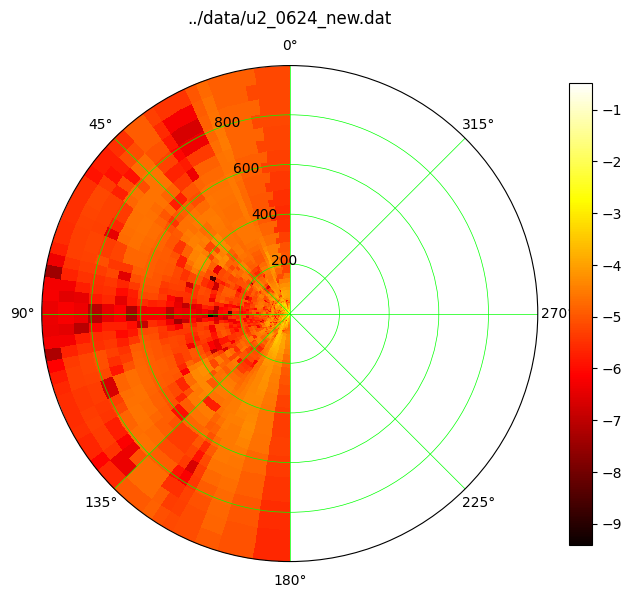

../data/u3_0624_new.dat (3072, 96) Min=-9.49e+02 Mean = -3.09e+00 Max=6.49e+00 | has nans? False | has negatives? True
log10!


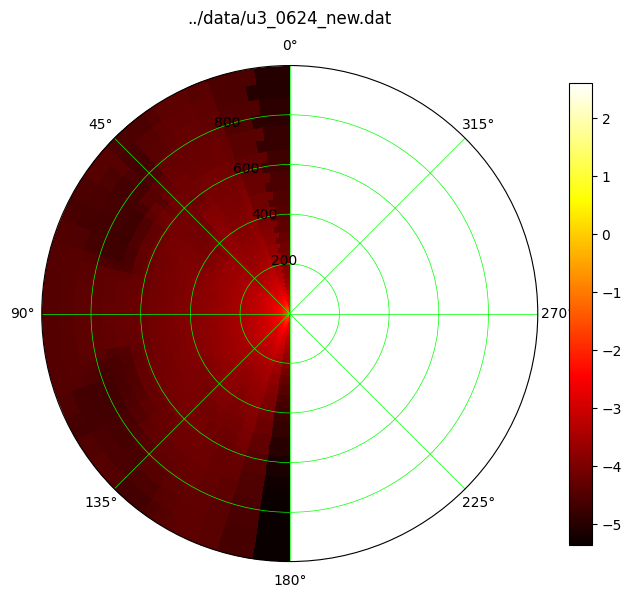

In [26]:
input_files = ['../data/ph_0624_new.dat',
               '../data/rh_0624_new.dat', # This one should have 48 more rows?
               '../data/ta_0624_new.dat',
               '../data/bb_0624_new.dat',       
               '../data/te_0624_new.dat', # Tau File
               '../data/u0_0624_new.dat',
               '../data/u1_0624_new.dat',
               '../data/u2_0624_new.dat',
               '../data/u3_0624_new.dat']

r_mesh, th_mesh = np.meshgrid(r_bins, th_bins)
for fn in input_files:
    d = np.loadtxt(fn)
    has_neg = np.min(d) < 0
    print(f'{fn} {d.shape} Min={np.nanmin(d):.2e} Mean = {np.nanmean(d):.2e} Max={np.nanmax(d):.2e} | has nans? {np.isnan(d).any()} | has negatives? {has_neg}')
    if d.shape[0] == 3072:
        data = abs(d[0:Nth+1,:])
        if np.max(data) > 1e4 or np.min(data) < 1e-4:
            print('log10!')
            data = np.log10(data)

                
        
        fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8, 8))
        ax.grid(color='lime', lw=0.5)
        ax.set_title(f'{fn}', pad=30)
        ax.set_theta_zero_location('N')
        m = ax.pcolormesh(th_mesh, r_mesh, data, cmap='hot')
        plt.colorbar(m, location='right', shrink=0.75)
        plt.show()

        
        #plt.figure(figsize=(8,8))
        #plt.imshow(d[0:Nth,:])
        #plt.colorbar(location='bottom')
        #plt.show()
        
        
    